In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [3]:
emotion_mapping = {
     "01": "neutral",
     "02": "calm",
     "03": "happy",
     "04": "sad",
     "05": "angry",
     "06": "fearful",
     "07": "disgust",
     "08": "surprised"
}

In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('actors'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('-')[2]
        label = label.split('.')[0]
        labels.append(emotion_mapping[label])
print('Dataset is Loaded')

Dataset is Loaded


In [19]:
len(paths)
paths[:5]
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'calm']

In [6]:
Data = pd.DataFrame()
Data['speech'] = paths
Data['label'] = labels
Data.head()

,speech,label
0,actors\Actor_01\03-01-01-01-01-01-01.wav,neutral
1,actors\Actor_01\03-01-01-01-01-02-01.wav,neutral
2,actors\Actor_01\03-01-01-01-02-01-01.wav,neutral
3,actors\Actor_01\03-01-01-01-02-02-01.wav,neutral
4,actors\Actor_01\03-01-02-01-01-01-01.wav,calm


In [7]:
Data['label'].value_counts()

label
calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

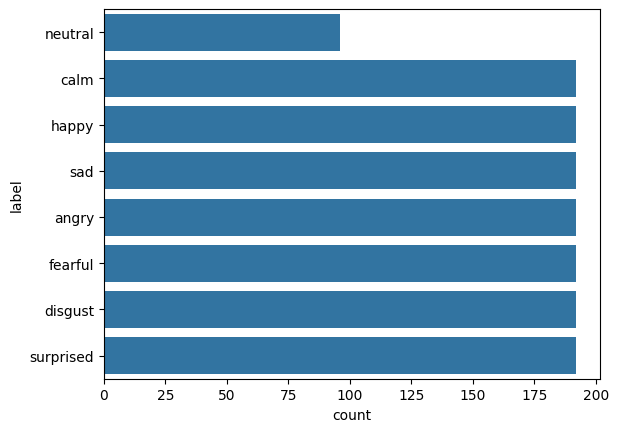

In [8]:
sns.countplot(Data['label'])

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

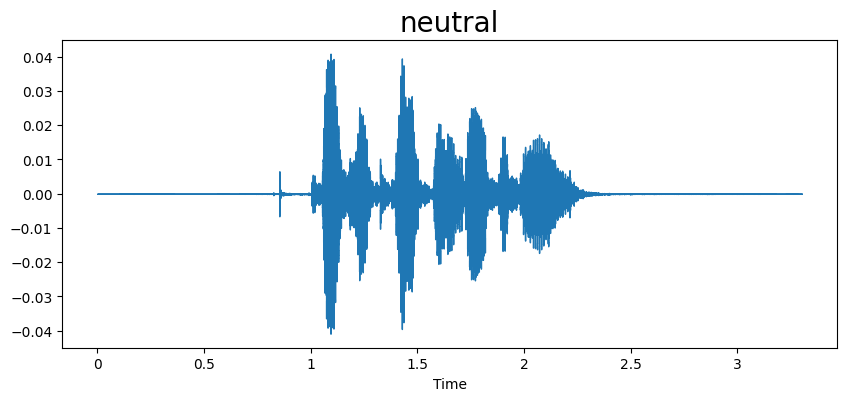

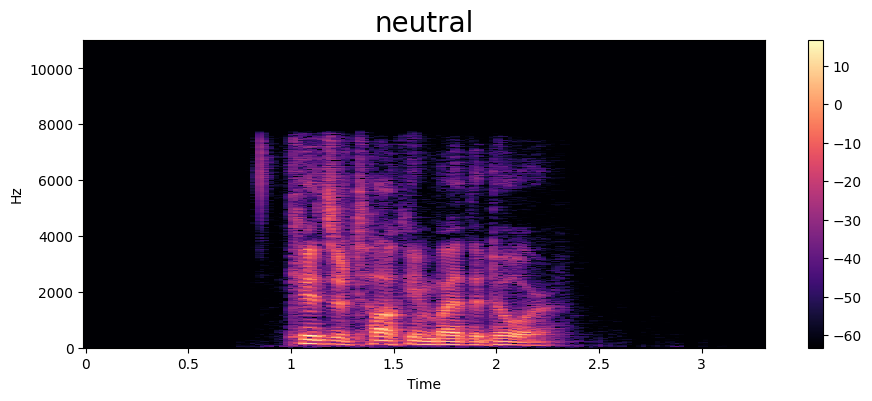

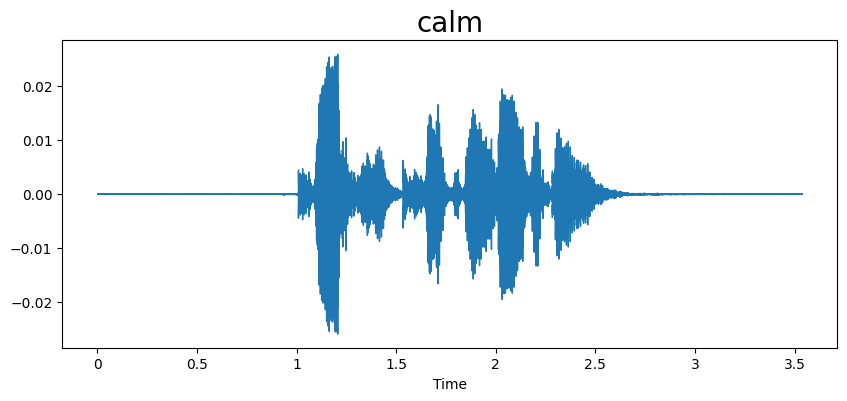

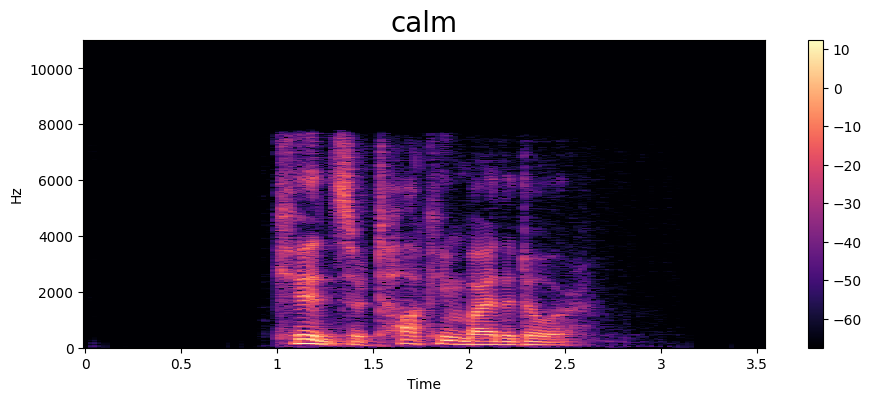

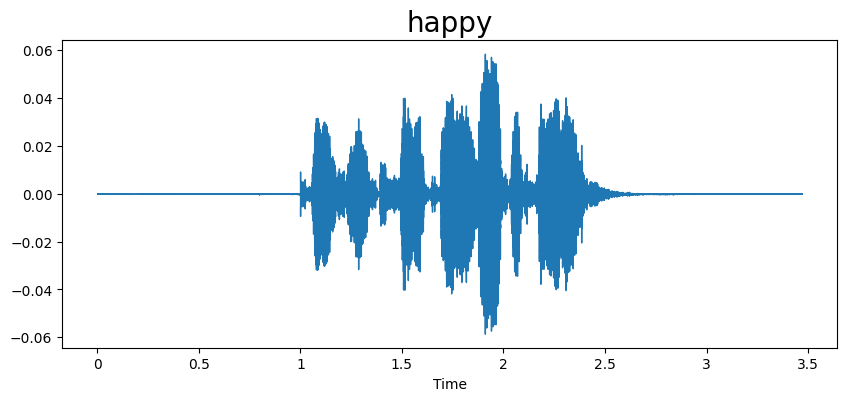

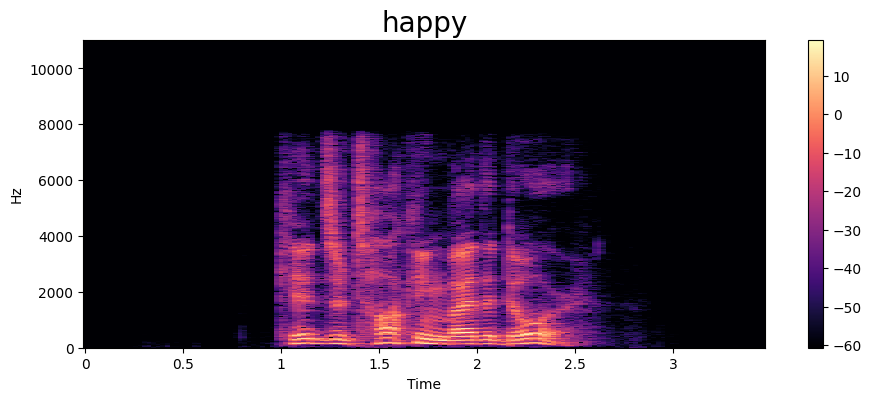

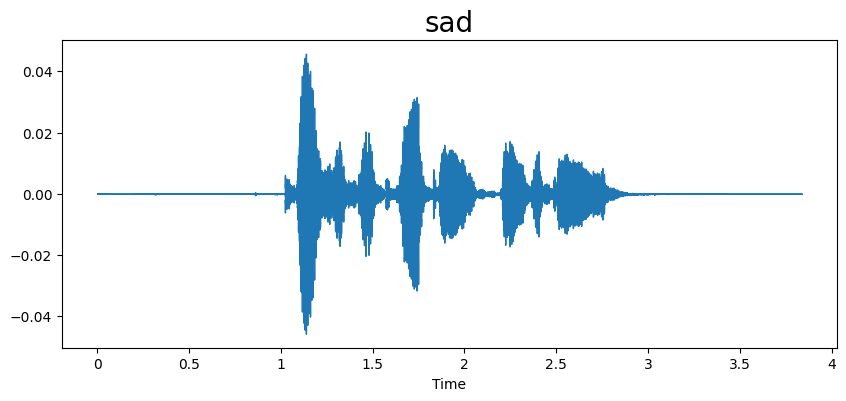

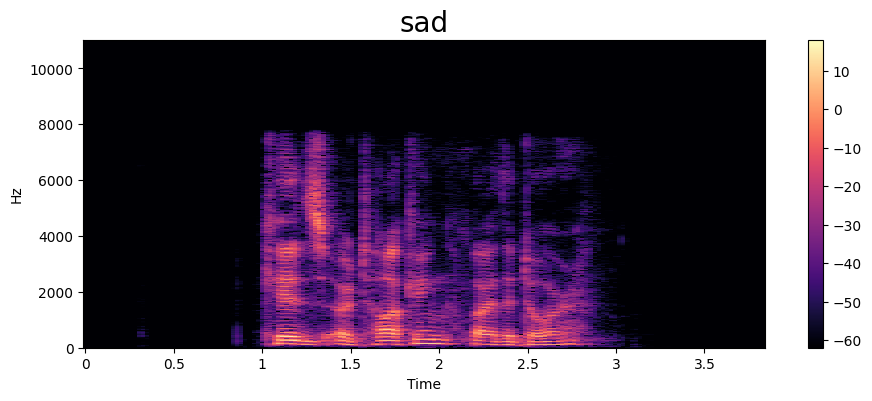

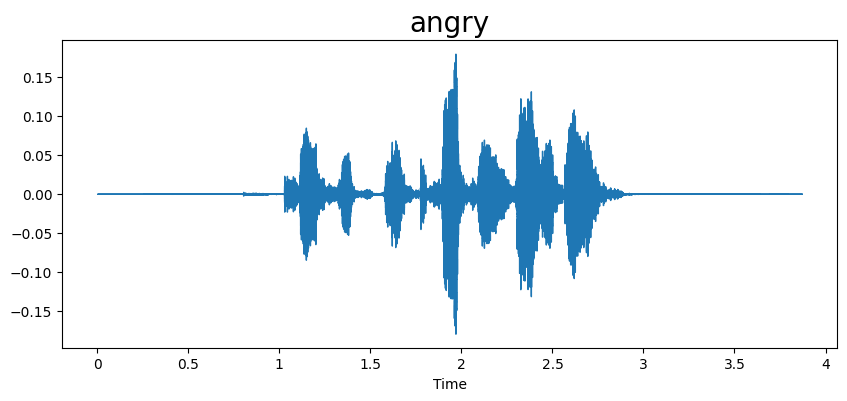

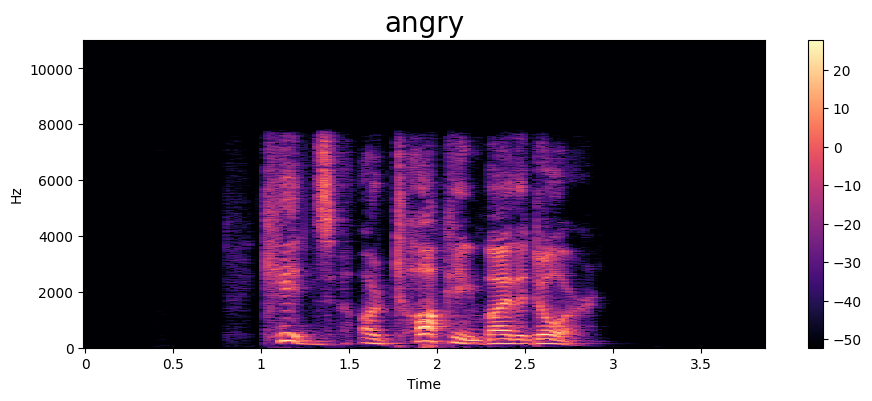

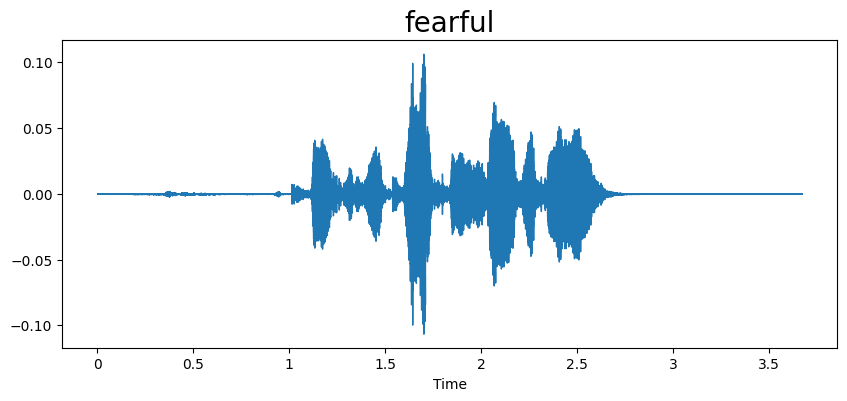

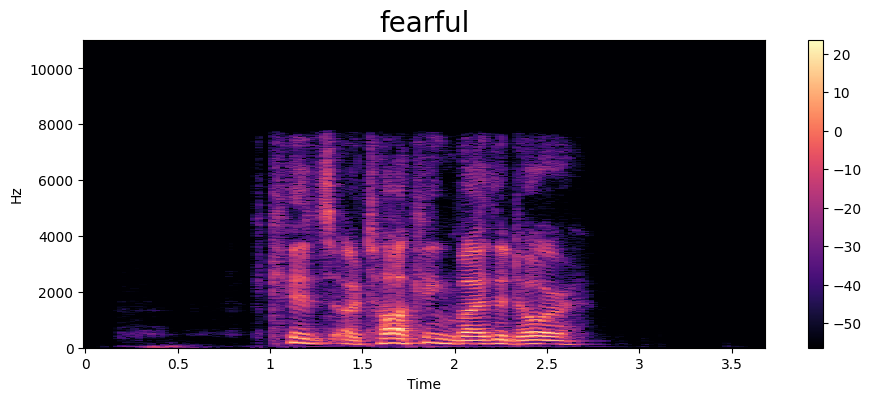

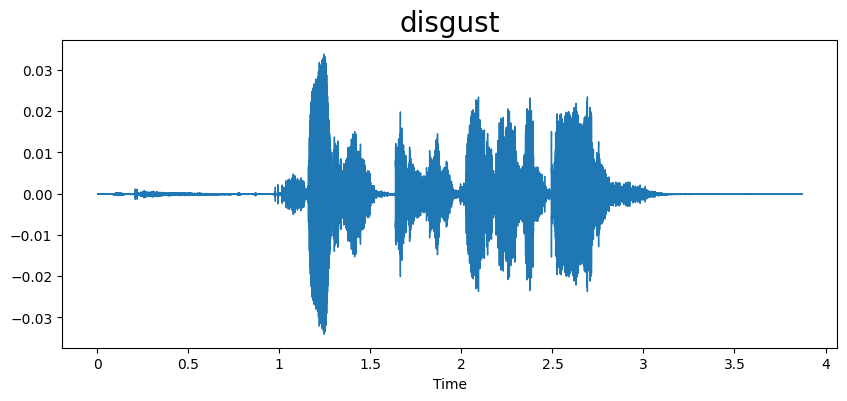

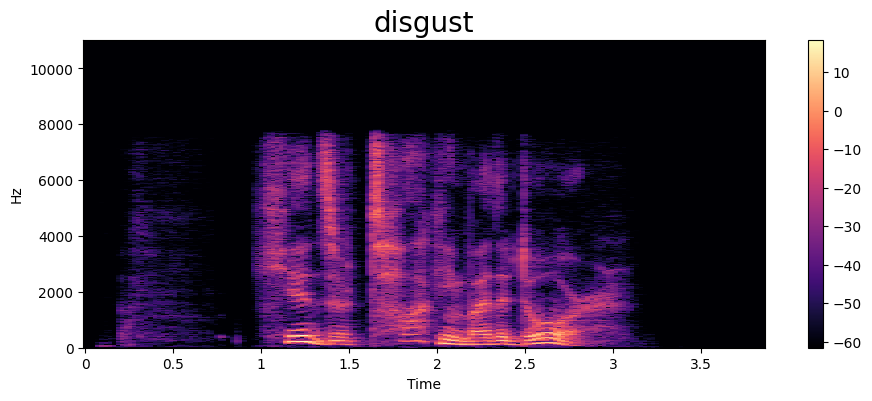

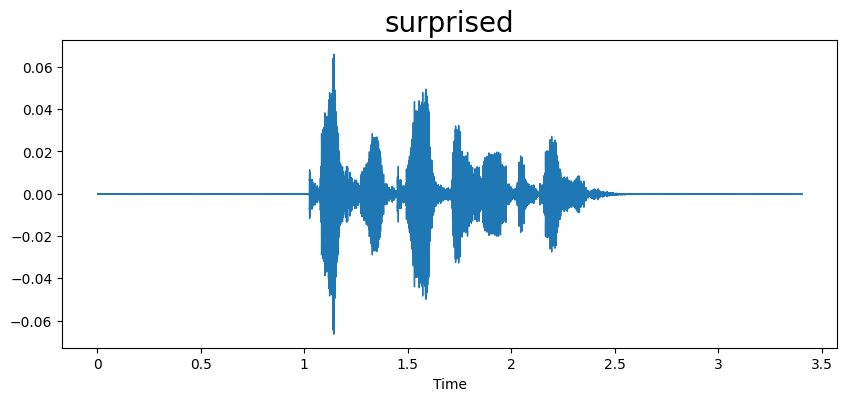

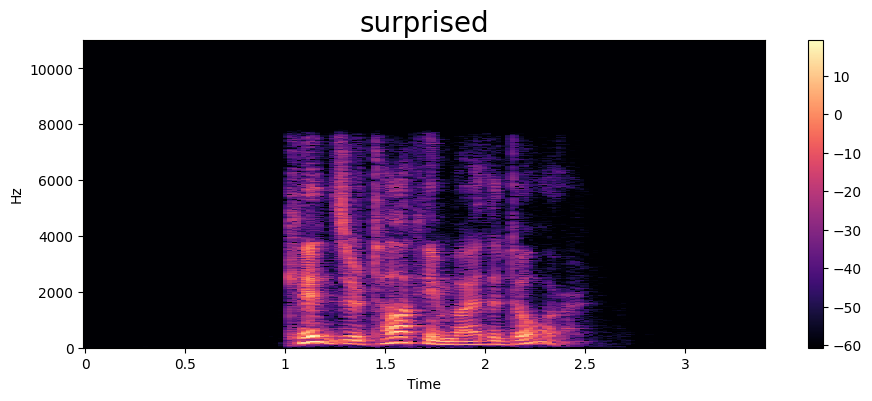

In [10]:
emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

for emotion in emotions:
        path = np.array(Data['speech'][Data['label'] == emotion])[0]
        data, sampling_rate = librosa.load(path)
        waveplot(data, sampling_rate, emotion)
        spectogram(data, sampling_rate, emotion)
        display(Audio(path))


In [11]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [12]:
extract_mfcc(Data['speech'][0])

array([-6.7856201e+02,  7.7576767e+01, -1.0928226e+01,  2.5414410e+01,
       -3.6407673e-01,  8.3914795e+00, -9.8866520e+00,  4.6216053e-01,
       -1.5446872e+01, -2.5478504e+00,  1.2006501e+00, -5.0549064e+00,
        4.2883315e+00, -6.9445438e+00,  3.1226974e+00, -1.6553175e+00,
       -2.7319129e+00, -4.1626220e+00, -4.4313249e-01, -2.0809019e+00,
       -6.7528963e+00, -8.1966621e-01, -2.9237857e+00, -5.0759110e+00,
       -2.2398496e+00, -8.6857361e-01, -5.6040969e+00, -1.7035121e-01,
       -1.9209818e+00, -7.6025325e-01, -1.1691678e+00, -3.7968590e+00,
       -1.7514011e+00, -3.6691167e+00, -2.3234389e+00, -3.1901412e+00,
        5.5933088e-02, -3.2892170e+00, -3.1629040e+00, -2.4840744e+00],
      dtype=float32)

In [13]:
X_mfcc = Data['speech'].apply(lambda x: extract_mfcc(x))

In [14]:
X_mfcc

0       [-678.562, 77.57677, -10.928226, 25.41441, -0....
1       [-669.3056, 76.37306, -15.135005, 29.210394, -...
2       [-670.1048, 78.264435, -12.059116, 24.98663, -...
3       [-666.8262, 78.110374, -9.366179, 26.95631, -2...
4       [-703.5392, 85.964775, -10.2719555, 29.001055,...
                              ...                        
1435    [-567.5831, 46.695198, -37.52629, 13.526845, -...
1436    [-489.2282, 73.172264, -41.90515, 12.4101095, ...
1437    [-495.93076, 64.59486, -48.24469, 17.887081, -...
1438    [-466.1084, 59.038635, -35.32733, 27.677193, -...
1439    [-502.89093, 59.063747, -25.848553, 18.274448,...
Name: speech, Length: 1440, dtype: object

In [15]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 40)

In [16]:
X = np.expand_dims(X, -1)
X.shape

(1440, 40, 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Data[['label']])

In [18]:
y = y.toarray()
y.shape

(1440, 8)